In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import label_binarize
from sklearn.impute import SimpleImputer

In [12]:
data=pd.read_csv(r"heart_disease.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [13]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [16]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [17]:
data['sex'] = data['sex'].map({'Male': 1, 'Female': 0})
data['cp'] = data['cp'].map({
    'typical angina': 1,
    'atypical angina': 2,
    'non-anginal': 3,
    'asymptomatic': 4
    })


In [18]:
data['restecg'] = data['restecg'].map({'normal': 0, 'lv hypertrophy': 1, 'st-t abnormality': 2})
data['slope'] = data['slope'].map({'upsloping': 1, 'flat': 0, 'downsloping': 2})
data['thal'] = data['thal'].map({'normal': 1, 'fixed defect': 2, 'reversable defect': 3})

In [19]:
data['exang'] = data['exang'].replace({'TRUE': 1, 'FALSE': 0, 'TURE': 1})

In [20]:
X = data.drop(columns=['num'])  # Features
y = data['num'] 

In [24]:
# Impute missing values with the median of each column
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

In [25]:
y_bin = label_binarize(y, classes=[0, 1, 2, 3, 4])  # Adjust classes based on your dataset
n_classes = y_bin.shape[1]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Initialize the model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [28]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [29]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[59 21  6  2  1]
 [18 14  9  6  1]
 [ 5  5  6  4  2]
 [ 6  6  2  3  0]
 [ 1  1  3  1  0]]
              precision    recall  f1-score   support

           0       0.66      0.66      0.66        89
           1       0.30      0.29      0.29        48
           2       0.23      0.27      0.25        22
           3       0.19      0.18      0.18        17
           4       0.00      0.00      0.00         6

    accuracy                           0.45       182
   macro avg       0.28      0.28      0.28       182
weighted avg       0.45      0.45      0.45       182



In [30]:
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1}")


F1 Score: 0.2778952744476103


In [31]:
plt.figure(figsize=(12,8))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=y.unique().astype(str))
plt.title("Decision Tree Visualization")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 1200x800 with 0 Axes>

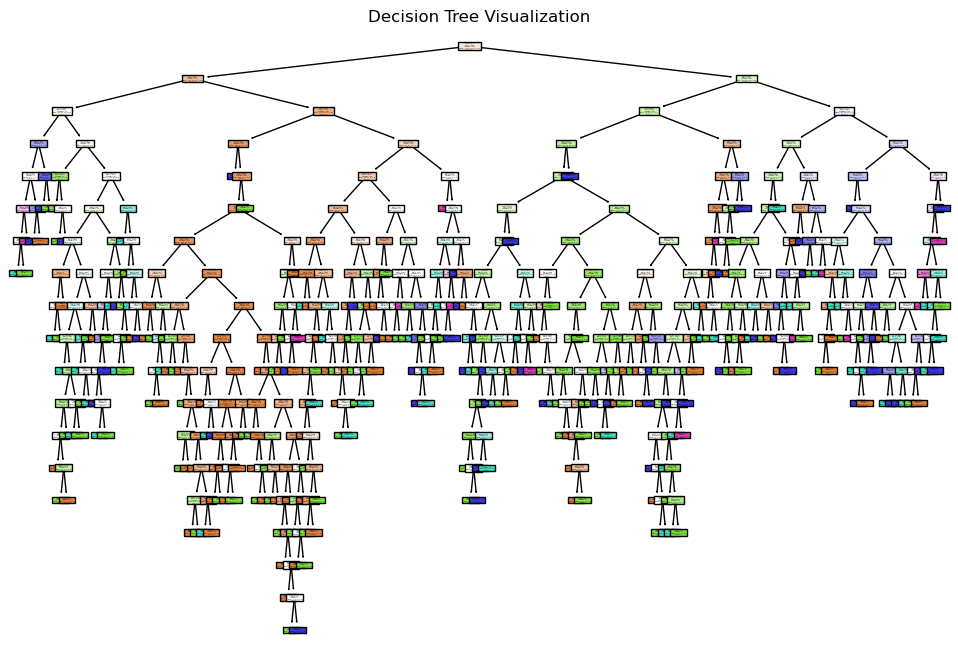

In [32]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(model, filled=True, feature_names=data.drop(columns=['num']).columns, class_names=y.unique().astype(str))
plt.title("Decision Tree Visualization")
plt.show()